# Approximate Rate Examples

In [1]:
import pynucastro as pyna

Let's create a simple network that has both an $(\alpha, \gamma)$ and
$(\alpha, p)(p, \gamma)$ sequence.

In [2]:
reaclib_library = pyna.ReacLibLibrary()

In [3]:
mylib = reaclib_library.linking_nuclei(["mg24", "al27", "si28", "p31", "s32", "he4", "p"])

In [4]:
pynet = pyna.PythonNetwork(libraries=[mylib])

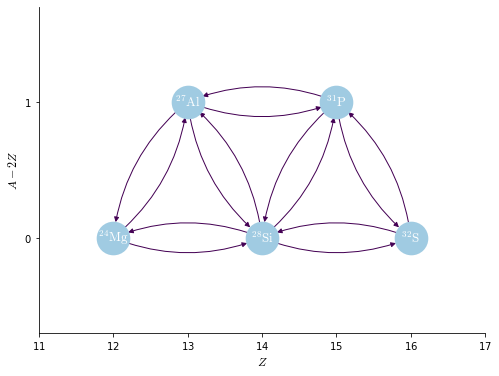

In [5]:
pynet.plot(rotated=True, curved_edges=True)

In [6]:
pynet.make_ap_pg_approx()

using approximate rate Mg24 + He4 ⟶ Si28 + 𝛾
using approximate rate Si28 ⟶ Mg24 + He4
using approximate rate Si28 + He4 ⟶ S32 + 𝛾
using approximate rate S32 ⟶ Si28 + He4
removing rate Mg24 + He4 ⟶ Si28 + 𝛾
removing rate Mg24 + He4 ⟶ p + Al27
removing rate Al27 + p ⟶ Si28 + 𝛾
removing rate Si28 ⟶ He4 + Mg24
removing rate Si28 ⟶ p + Al27
removing rate Al27 + p ⟶ He4 + Mg24
removing rate Si28 + He4 ⟶ S32 + 𝛾
removing rate Si28 + He4 ⟶ p + P31
removing rate P31 + p ⟶ S32 + 𝛾
removing rate S32 ⟶ He4 + Si28
removing rate S32 ⟶ p + P31
removing rate P31 + p ⟶ He4 + Si28


In [7]:
pynet

P31 ⟶ He4 + Al27
Al27 + He4 ⟶ P31 + 𝛾
Mg24 + He4 ⟶ Si28 + 𝛾
Si28 ⟶ Mg24 + He4
Si28 + He4 ⟶ S32 + 𝛾
S32 ⟶ Si28 + He4

now remove the isolated Al27 and P31 nuclei

In [8]:
pynet.remove_nuclei(["al27", "p31"])

looking to remove P31 ⟶ He4 + Al27
looking to remove Al27 + He4 ⟶ P31 + 𝛾
looking to remove P31 ⟶ He4 + Al27
looking to remove Al27 + He4 ⟶ P31 + 𝛾


In [9]:
pynet

Mg24 + He4 ⟶ Si28 + 𝛾
Si28 ⟶ Mg24 + He4
Si28 + He4 ⟶ S32 + 𝛾
S32 ⟶ Si28 + He4

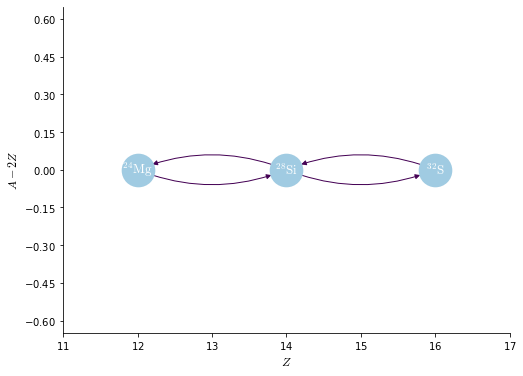

In [10]:
pynet.plot(rotated=True, curved_edges=True)

In [11]:
pynet.write_network()

import numpy as np
from pynucastro.rates import Tfactors
import numba

jhe4 = 0
jmg24 = 1
jsi28 = 2
js32 = 3
nnuc = 4

A = np.zeros((nnuc), dtype=np.int32)

A[jhe4] = 4
A[jmg24] = 24
A[jsi28] = 28
A[js32] = 32

Z = np.zeros((nnuc), dtype=np.int32)

Z[jhe4] = 2
Z[jmg24] = 12
Z[jsi28] = 14
Z[js32] = 16

names = []
names.append("he4")
names.append("mg24")
names.append("si28")
names.append("s32")

@numba.njit()
def ye(Y):
    return np.sum(Z * Y)/np.sum(A * Y)

@numba.njit()
def he4_mg24__si28(tf):
    # mg24 + he4 --> si28
    rate = 0.0
    
    # st08r
    rate += np.exp(  -50.5494 + -12.8332*tf.T9i + 21.3721*tf.T913i + 37.7649*tf.T913
                  + -4.10635*tf.T9 + 0.249618*tf.T953 + -1.5*tf.lnT9)
    # st08r
    rate += np.exp(  8.03977 + -15.629*tf.T9i
                  + -1.5*tf.lnT9)
    
    return rate

@numba.njit()
def he4_mg24__p_al27(tf):
    # mg24 + he4 --> p + al27
    rate = 0.0
    
    # il10n
    rate += np.exp(  30.0397 + -18.5791*tf.T9i + -26.4162*tf.T913i
    